# Self-Driving Car Engineer Nanodegree

## Deep Learning

## Project: Build a Traffic Sign Recognition Classifier

In this notebook, a template is provided for you to implement your functionality in stages, which is required to successfully complete this project. If additional code is required that cannot be included in the notebook, be sure that the Python code is successfully imported and included in your submission if necessary. 

> **Note**: Once you have completed all of the code implementations, you need to finalize your work by exporting the iPython Notebook as an HTML document. Before exporting the notebook to html, all of the code cells need to have been run so that reviewers can see the final implementation and output. You can then export the notebook by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission. 

In addition to implementing code, there is a writeup to complete. The writeup should be completed in a separate file, which can be either a markdown file or a pdf document. There is a [write up template](https://github.com/udacity/CarND-Traffic-Sign-Classifier-Project/blob/master/writeup_template.md) that can be used to guide the writing process. Completing the code template and writeup template will cover all of the [rubric points](https://review.udacity.com/#!/rubrics/481/view) for this project.

The [rubric](https://review.udacity.com/#!/rubrics/481/view) contains "Stand Out Suggestions" for enhancing the project beyond the minimum requirements. The stand out suggestions are optional. If you decide to pursue the "stand out suggestions", you can include the code in this Ipython notebook and also discuss the results in the writeup file.


>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

---
## Step 0: Load The Data

In [1]:
# Load pickled data
import pickle

# Define data locations
training_file = "../data/train.p"
validation_file = "../data/valid.p"
testing_file = "../data/test.p"

# Open and load
with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(validation_file, mode='rb') as f:
    valid = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)

# Store the features and lables in the X and y arrays respectively
X_train, y_train = train['features'], train['labels']
X_valid, y_valid = valid['features'], valid['labels']
X_test, y_test = test['features'], test['labels']

---

## Step 1: Dataset Summary & Exploration

The pickled data is a dictionary with 4 key/value pairs:

- `'features'` is a 4D array containing raw pixel data of the traffic sign images, (num examples, width, height, channels).
- `'labels'` is a 1D array containing the label/class id of the traffic sign. The file `signnames.csv` contains id -> name mappings for each id.
- `'sizes'` is a list containing tuples, (width, height) representing the original width and height the image.
- `'coords'` is a list containing tuples, (x1, y1, x2, y2) representing coordinates of a bounding box around the sign in the image. **THESE COORDINATES ASSUME THE ORIGINAL IMAGE. THE PICKLED DATA CONTAINS RESIZED VERSIONS (32 by 32) OF THESE IMAGES**

Complete the basic data summary below. Use python, numpy and/or pandas methods to calculate the data summary rather than hard coding the results. For example, the [pandas shape method](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.shape.html) might be useful for calculating some of the summary results. 

### 1.1. Provide a Basic Summary of the Data Set Using Python, Numpy and/or Pandas

In [2]:
### Summary of the dataset

# Get number of training examples
n_train = len(X_train)

# Get number of validation examples
n_validation = len(X_valid)

# Get number of testing examples.
n_test = len(X_test)

# Get the shape of an traffic sign image?
image_shape = X_train[0].shape

# Get the number of unique classes/labels there are in the dataset.
n_classes = len(set(y_train))

print("Number of training examples =", n_train)
print("Number of validation examples =", n_validation)
print("Number of testing examples =", n_test)
print("Image data shape =", image_shape)
print("Number of classes =", n_classes)

Number of training examples = 34799
Number of validation examples = 4410
Number of testing examples = 12630
Image data shape = (32, 32, 3)
Number of classes = 43


### 1.2 Include an exploratory visualization of the dataset

Visualize the German Traffic Signs Dataset using the pickled file(s). This is open ended, suggestions include: plotting traffic sign images, plotting the count of each sign, etc. 

The [Matplotlib](http://matplotlib.org/) [examples](http://matplotlib.org/examples/index.html) and [gallery](http://matplotlib.org/gallery.html) pages are a great resource for doing visualizations in Python.

**NOTE:** It's recommended you start with something simple first. If you wish to do more, come back to it after you've completed the rest of the sections. It can be interesting to look at the distribution of classes in the training, validation and test set. Is the distribution the same? Are there more examples of some classes than others?

Dimensions of the image: (32, 32, 3)
Classification index of the image: 3


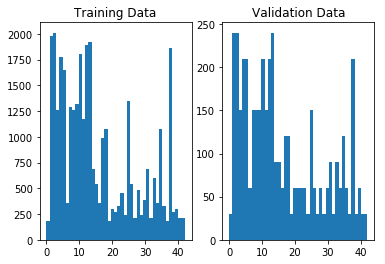

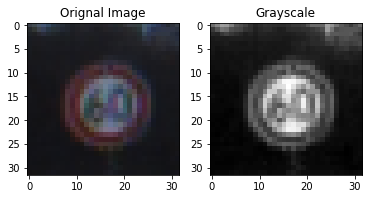

In [6]:
### Data visualization

# import the libraries
import matplotlib.pyplot as plt
import random
import numpy as np
import cv2

# Visualizations will be shown in the notebook.
%matplotlib inline

# Choose a random image from the training sample
index = random.randint(0, len(X_train))
image_orig = X_train[index].squeeze()
gray_image = cv2.cvtColor(image_orig, cv2.COLOR_RGB2GRAY)

# Print Image data
print("Dimensions of the image: " + str(image_orig.shape))
print("Classification index of the image: " + str(y_train[index]))

## Plot Histogram of the image classification
f1, (ax1, ax2) = plt.subplots(1, 2)
ax1.set_title('Training Data')
ax1.hist(y_train, bins = n_classes)
ax2.set_title('Validation Data')
ax2.hist(y_valid, bins = n_classes)

# Plot the images
f2, (ax1, ax2) = plt.subplots(1, 2)
ax1.set_title('Orignal Image')
ax1.imshow(image_orig)
ax2.set_title('Grayscale')
ax2.imshow(gray_image, cmap='gray')


----

## Step 2: Design and Test a Model Architecture

Design and implement a deep learning model that learns to recognize traffic signs. Train and test your model on the [German Traffic Sign Dataset](http://benchmark.ini.rub.de/?section=gtsrb&subsection=dataset).

The LeNet-5 implementation shown in the [classroom](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) at the end of the CNN lesson is a solid starting point. You'll have to change the number of classes and possibly the preprocessing, but aside from that it's plug and play! 

With the LeNet-5 solution from the lecture, you should expect a validation set accuracy of about 0.89. To meet specifications, the validation set accuracy will need to be at least 0.93. It is possible to get an even higher accuracy, but 0.93 is the minimum for a successful project submission. 

There are various aspects to consider when thinking about this problem:

- Neural network architecture (is the network over or underfitting?)
- Play around preprocessing techniques (normalization, rgb to grayscale, etc)
- Number of examples per label (some have more than others).
- Generate fake data.

Here is an example of a [published baseline model on this problem](http://yann.lecun.com/exdb/publis/pdf/sermanet-ijcnn-11.pdf). It's not required to be familiar with the approach used in the paper but, it's good practice to try to read papers like these.

### 2.1. Pre-process the Data Set (normalization, grayscale, etc.)

Minimally, the image data should be normalized so that the data has mean zero and equal variance. For image data, `(pixel - 128)/ 128` is a quick way to approximately normalize the data and can be used in this project. 

Other pre-processing steps are optional. You can try different techniques to see if it improves performance. 

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project.

In [7]:
## Preporocessing of the images
## Convert to Grayscale
## Normalize the values

print("Shape of original training set: " + str(X_train.shape))

def conv_grayscale(image):
    """
    Convert the images passed to grayscale
    Expands the grayscale array dimension to 32x32x1 
    Return the grayscale image
    """
    # Convert to grayscle
    gs_image = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
    #print(gs_image.shape)
    #gs_image = [gs_image,np.zeros([gs_image.shape[0],gs_image.shape[1]])]
    gs_image = np.expand_dims(gs_image, axis=3)
    #print(gs_image.shape)
    return gs_image


def norm_data(X_data_orig):
    """
    Receive original image
    Normalize the data
    Return normalized data
    """
    X_data_norm = np.zeros([X_data_orig.shape[0], X_data_orig.shape[1], 
                            X_data_orig.shape[2], 1])  
    n_data = len(X_data_orig)
    
    for i in range(n_data):
        image = X_data_orig[i]
        
        # Call function to convert to grayscale with correct dimensions
        gs_image = conv_grayscale(image)
       
        # Normalize the image
        norm_gs = np.zeros_like(gs_image)      
        norm_gs = (np.int8(gs_image)-128)/128        
        X_data_norm[i] = norm_gs   
        
    return X_data_norm

# Call the function to normalize the datasets
X_train_norm = norm_data(X_train)
X_valid_norm = norm_data(X_valid)
X_test_norm = norm_data(X_test)

# Print the array shapes to verify
print("Shape of original training set: " + str(X_train.shape))
print("Shape of normalized data training set: " + str(X_train_norm.shape))
print("Shape of normalized image in training set: " + str(X_train_norm[0].shape))

#print(X_train_norm[0])
#print(X_train[0])


Shape of original training set: (34799, 32, 32, 3)
Shape of original training set: (34799, 32, 32, 3)
Shape of normalized data training set: (34799, 32, 32, 1)
Shape of normalized image in training set: (32, 32, 1)


### 2.2. Model Architecture

#### 2.2.1 Model Architecture Hyperparameters

In [50]:
# Import libraries
import tensorflow as tf
from tensorflow.contrib.layers import flatten

# Set parameters
EPOCHS = 50
BATCH_SIZE = 64
rate = 0.0005
col_channels = 3 # 1: for grayscale and 3: for color images
ker_size = 5
num_depth_1 = 6
num_depth_2 = 16
num_depth_3 = 400
num_depth_4 = 120
dropout_train = 0.75
# n_classes #

#### 2.2.2 Define Model Architecture

In [51]:
# Define the architecture

def LeNet(x):
    # Arguments used for tf.truncated_normal, randomly defines variables for the weights and biases for each layer
    mu = 0.1      # Mean for weight intialization    
    sigma = 0.1   # Standard deviation
    
    # Weights for each layer
    weights = {
    'l1': tf.Variable(tf.truncated_normal([ker_size, ker_size, col_channels, num_depth_1], mean = mu, stddev = sigma)),
    'l2': tf.Variable(tf.truncated_normal([ker_size, ker_size, num_depth_1, num_depth_2], mean = mu, stddev = sigma)),
    'l3': tf.Variable(tf.truncated_normal([ker_size*ker_size*num_depth_2, num_depth_3], mean = mu, stddev = sigma)),
    'l4': tf.Variable(tf.truncated_normal([num_depth_3, num_depth_4], mean = mu, stddev = sigma)),
    'l5': tf.Variable(tf.truncated_normal([num_depth_4, n_classes], mean = mu, stddev = sigma))}
    
    # Bias for each layer
    biases = {
    'l1': tf.Variable(tf.zeros([num_depth_1])),
    'l2': tf.Variable(tf.zeros([num_depth_2])),
    'l3': tf.Variable(tf.zeros([num_depth_3])),
    'l4': tf.Variable(tf.zeros([num_depth_4])),
    'l5': tf.Variable(tf.zeros([n_classes]))}
    
    # Layer 1: Convolutional. Input = 32x32x1. Output = 28x28x6.
    strides = [1, 1, 1, 1]
    l1 = tf.nn.conv2d(x, weights['l1'], strides=strides, padding='VALID')
    l1 = tf.nn.bias_add(l1, biases['l1'])   
    
    # Relu Activation.
    l1 = tf.nn.relu(l1)

    # Maxpooling. Input = 28x28x6. Output = 14x14x6.
    ksize = [1, 2, 2, 1]
    strides = [1, 2, 2, 1]
    l1 = tf.nn.max_pool(l1, ksize=ksize, strides=strides, padding='SAME')    
    
    # Layer 2: Convolutional. Output = 10x10x16.
    strides = [1, 1, 1, 1]
    l2 = tf.nn.conv2d(l1, weights['l2'], strides, padding='VALID')
    l2 = tf.nn.bias_add(l2, biases['l2'])
    
    # Relu Activation.
    l2 = tf.nn.relu(l2)
    
    # Maxpooling. Input = 10x10x16. Output = 5x5x16.
    ksize = [1, 2, 2, 1]
    strides = [1, 2, 2, 1]
    l2 = tf.nn.max_pool(l2, ksize=ksize, strides=strides, padding='SAME')
    
    # Flatten. Input = 5x5x16. Output = 400.
    l3 = tf.contrib.layers.flatten(l2)
    
    # Layer 3: Fully Connected. Input = 5x5x16. Output = 400.
    l3 = tf.add(tf.matmul(l3, weights['l3']), biases['l3'])
    
    
    # Relu Activation.
    l3 = tf.nn.relu(l3)
    
    # Dropout
    l3 = tf.nn.dropout(l3, keep_prob)
    
    # Layer 4: Fully Connected. Input = 400. Output = 120
    l4 = tf.add(tf.matmul(l3, weights['l4']), biases['l4'])
    
    # Relu Activation.
    l4 = tf.nn.relu(l4)
    
    # dropout
    l4 = tf.nn.dropout(l4, keep_prob)
    
    # Layer 5: Fully Connected. Input = 120. Output = 10.
    l5 = tf.add(tf.matmul(l4, weights['l5']), biases['l5'])
    logits = l5
    
    return logits

#### 2.2.3 Declare Tensorflow Variables

In [52]:
# Set tf placeholders

x = tf.placeholder(tf.float32, (None, 32, 32, col_channels))
y = tf.placeholder(tf.int32, (None))
one_hot_y = tf.one_hot(y, n_classes)

keep_prob = tf.placeholder(tf.float32)

### 2.3 Train, Validate and Test the Model

A validation set can be used to assess how well the model is performing. A low accuracy on the training and validation
sets imply underfitting. A high accuracy on the training set but low accuracy on the validation set implies overfitting.

#### 2.3.1 Define TF Functions

In [53]:
## Define tf functions

logits = LeNet(x)
cross_entropy = tf.nn.softmax_cross_entropy_with_logits(labels=one_hot_y, logits=logits)
loss_operation = tf.reduce_mean(cross_entropy)
optimizer = tf.train.AdamOptimizer(learning_rate = rate)
training_operation = optimizer.minimize(loss_operation)


#### 2.3.2 Define Evaluation Function

In [54]:

correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(one_hot_y, 1))
accuracy_operation = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
saver = tf.train.Saver()

def evaluate(X_data, y_data):
    """
    Get X and Y datasets
    Evaluate accuracy and return
    """
    num_examples = len(X_data)
    total_accuracy = 0
    sess = tf.get_default_session()
    for offset in range(0, num_examples, BATCH_SIZE):
        batch_x, batch_y = X_data[offset:offset+BATCH_SIZE], y_data[offset:offset+BATCH_SIZE]
        accuracy = sess.run(accuracy_operation, feed_dict={x: batch_x, y: batch_y, keep_prob: 1.})
        total_accuracy += (accuracy * len(batch_x))
    return total_accuracy / num_examples


#### 2.3.3 Model Training

In [55]:
# Train the model
from sklearn.utils import shuffle

# Initialize accuracy arrays
valid_accuracy_trend = []
train_accuracy_trend = []

# Run the tf session and execute training operation
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    num_examples = len(X_train)
    
    print("Training...")
    print()
    for i in range(EPOCHS):
        X_train_sess, y_train_sess = shuffle(X_train, y_train)
        #X_train_sess, y_train_sess = shuffle(X_train_norm, y_train)    # Use for normalized dataset
        for offset in range(0, num_examples, BATCH_SIZE):
            end = offset + BATCH_SIZE
            batch_x, batch_y = X_train_sess[offset:end], y_train_sess[offset:end]
            sess.run(training_operation, feed_dict={x: batch_x, y: batch_y, keep_prob: dropout_train})
            
        validation_accuracy = evaluate(X_valid, y_valid)
        #validation_accuracy = evaluate(X_valid_norm, y_valid)
        valid_accuracy_trend.append(validation_accuracy)
        train_accuracy = evaluate(X_train_sess, y_train_sess)
        train_accuracy_trend.append(train_accuracy)
        print("EPOCH {} ...".format(i+1))
        print("Validation Accuracy = {:.3f}".format(validation_accuracy))
        print("Training Accuracy = {:.3f}".format(train_accuracy))   
        print()
    
    # save session
    saver.save(sess, './lenet')
    print("Model saved")
    


Training...

EPOCH 1 ...
Validation Accuracy = 0.224
Training Accuracy = 0.288

EPOCH 2 ...
Validation Accuracy = 0.432
Training Accuracy = 0.523

EPOCH 3 ...
Validation Accuracy = 0.652
Training Accuracy = 0.767

EPOCH 4 ...
Validation Accuracy = 0.771
Training Accuracy = 0.865

EPOCH 5 ...
Validation Accuracy = 0.833
Training Accuracy = 0.916

EPOCH 6 ...
Validation Accuracy = 0.857
Training Accuracy = 0.934

EPOCH 7 ...
Validation Accuracy = 0.868
Training Accuracy = 0.954

EPOCH 8 ...
Validation Accuracy = 0.881
Training Accuracy = 0.959

EPOCH 9 ...
Validation Accuracy = 0.896
Training Accuracy = 0.971

EPOCH 10 ...
Validation Accuracy = 0.903
Training Accuracy = 0.976

EPOCH 11 ...
Validation Accuracy = 0.896
Training Accuracy = 0.979

EPOCH 12 ...
Validation Accuracy = 0.911
Training Accuracy = 0.983

EPOCH 13 ...
Validation Accuracy = 0.920
Training Accuracy = 0.987

EPOCH 14 ...
Validation Accuracy = 0.919
Training Accuracy = 0.989

EPOCH 15 ...
Validation Accuracy = 0.917
Tra

#### 2.3.4 Display Accuracy Data

Maximum Training Accuracy: 1.000
Maximum Validation Accuracy: 0.949


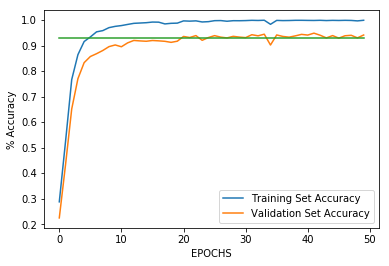

In [56]:
## Print the model training data

# Print the accuracy data
print("Maximum Training Accuracy: {:.3f}".format(max(train_accuracy_trend)))
print("Maximum Validation Accuracy: {:.3f}".format(max(valid_accuracy_trend)))

# Plot accuracy chart
fig, ax = plt.subplots()
ax.plot(train_accuracy_trend, label='Training Set Accuracy')
ax.plot(valid_accuracy_trend, label='Validation Set Accuracy')
ax.plot(np.ones_like(train_accuracy_trend)*0.93)
plt.xlabel('EPOCHS')
plt.ylabel('% Accuracy')
leg = plt.legend()

### 2.4. Apply the Model To Test Data ###

In [57]:
# Evaluate the model on test data

# Run tf session and evaluate
with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('.'))

    test_accuracy = evaluate(X_test, y_test)
    print("Test Accuracy = {:.3f}".format(test_accuracy))

INFO:tensorflow:Restoring parameters from ./lenet
Test Accuracy = 0.923


---

## Step 3: Test a Model on New Images

To give yourself more insight into how your model is working, download at least five pictures of German traffic signs from the web and use your model to predict the traffic sign type.

You may find `signnames.csv` useful as it contains mappings from the class id (integer) to the actual sign name.

### 3.1. Load and Output the Images

#### 3.1.1 Resize the Images

This is needed if the images are not the same size/ proportion as the test images; in this case 32x32

In [20]:
## Resize the images and save them

import os

def resize_images():
    """
    Reads images from input folder
    Reshapes them to a defined dimension (32x32 here)
    Writes the images to the output folder
    """
    
    # Define the input folder
    in_folder = "./new_images/original/"
    out_folder = "./new_images/"

    files = os.listdir(in_folder)

    for file in files:    

        img = cv2.imread(in_folder + file)
        print('Original Dimensions : ',img.shape)
        dim = (32, 32)
        # resize image
        resized = cv2.resize(img, dim, interpolation = cv2.INTER_AREA)    
        print('Resized Dimensions : ',resized.shape)
        cv2.imwrite(out_folder+file, resized)
    print("Images Resized")

# Comment out the function call after doing once 
#resize_images()


#### 3.1.2 Load and Display Images


./new_images/18_1.jpg
./new_images/13_1.jpg
./new_images/14_1.jpg
./new_images/9_1.png
./new_images/26_1.jpg
./new_images/17_1.jpg
./new_images/2_1.jpg
./new_images/11_1.png
./new_images/3_1.png
./new_images/27_1.jpg


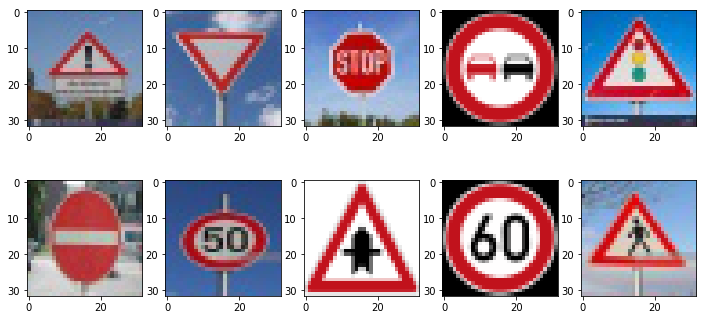

In [29]:

# import the image library
import matplotlib.image as mpimg
import cv2
%matplotlib inline

# Define folder where images are located
in_folder = "./new_images/"
files = os.listdir(in_folder)

# Number of pictures
num_pics = 10
i = 0

# Initialize list for images, and their y-encoding 
X_new_images = []
y_all_images = np.array([18, 13, 14, 9, 26, 
                         17, 2, 11, 3, 27, 11]) 
y_new_images = y_all_images[:num_pics]

# Loop through the files in the folder
for file in files:
    # Avoid non-image files
    if ("jpg" in file) or ("png" in file):
        i += 1
        if i > num_pics:
            break    
        new_img = cv2.imread(in_folder + file)
        print(in_folder + file)
        new_img = cv2.cvtColor(new_img, cv2.COLOR_BGR2RGB)
        X_new_images.append(new_img)
    
# Convert image list to np array
X_new_images = np.array(X_new_images)

# Plot the images
fig=plt.figure(figsize=(12, 12))
columns = 5
rows = 4
for i in range(1, num_pics+1):
    img_print = X_new_images[i-1]
    fig.add_subplot(rows, columns, i)
    plt.imshow(img_print, cmap='gray')
plt.show()


### 3.2. Predict the Sign Type for Each Image

In [34]:
### Run the predictions here and use the model to output the prediction for each image.

# Define tf function for prediction
new_prediction = tf.argmax(logits, 1)

# Normalize the images
X_new_norm = norm_data(X_new_images)

# Run the tf session and predict
with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('.'))
    new_output = sess.run(new_prediction, feed_dict={x: X_new_images, y: y_new_images, keep_prob: 1.})
    print("Prediction: ", new_output)
    print("Actual    : ", y_new_images)



INFO:tensorflow:Restoring parameters from ./lenet
Prediction:  [ 9 13 17  9 38 17  3 11  2  4]
Actual    :  [18 13 14  9 26 17  2 11  3 27]


### 3.3. Analyze Performance

In [31]:
### Calculate the accuracy for the new images. 

# Run the tf session and evaluate
with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('.'))
    
    new_image_accuracy = evaluate(X_new_images, y_new_images)
    print("Test Accuracy = {:.3f}".format(new_image_accuracy))
    

INFO:tensorflow:Restoring parameters from ./lenet
Test Accuracy = 0.400


### 3.4. Output Top 5 Softmax Probabilities For Each Image Found on the Web

For each of the new images, print out the model's softmax probabilities to show the **certainty** of the model's predictions (limit the output to the top 5 probabilities for each image). [`tf.nn.top_k`](https://www.tensorflow.org/versions/r0.12/api_docs/python/nn.html#top_k) could prove helpful here. 

The example below demonstrates how tf.nn.top_k can be used to find the top k predictions for each image.

`tf.nn.top_k` will return the values and indices (class ids) of the top k predictions. So if k=3, for each sign, it'll return the 3 largest probabilities (out of a possible 43) and the correspoding class ids.

Take this numpy array as an example. The values in the array represent predictions. The array contains softmax probabilities for five candidate images with six possible classes. `tf.nn.top_k` is used to choose the three classes with the highest probability:

```
# (5, 6) array
a = np.array([[ 0.24879643,  0.07032244,  0.12641572,  0.34763842,  0.07893497,
         0.12789202],
       [ 0.28086119,  0.27569815,  0.08594638,  0.0178669 ,  0.18063401,
         0.15899337],
       [ 0.26076848,  0.23664738,  0.08020603,  0.07001922,  0.1134371 ,
         0.23892179],
       [ 0.11943333,  0.29198961,  0.02605103,  0.26234032,  0.1351348 ,
         0.16505091],
       [ 0.09561176,  0.34396535,  0.0643941 ,  0.16240774,  0.24206137,
         0.09155967]])
```

Running it through `sess.run(tf.nn.top_k(tf.constant(a), k=3))` produces:

```
TopKV2(values=array([[ 0.34763842,  0.24879643,  0.12789202],
       [ 0.28086119,  0.27569815,  0.18063401],
       [ 0.26076848,  0.23892179,  0.23664738],
       [ 0.29198961,  0.26234032,  0.16505091],
       [ 0.34396535,  0.24206137,  0.16240774]]), indices=array([[3, 0, 5],
       [0, 1, 4],
       [0, 5, 1],
       [1, 3, 5],
       [1, 4, 3]], dtype=int32))
```

Looking just at the first row we get `[ 0.34763842,  0.24879643,  0.12789202]`, you can confirm these are the 3 largest probabilities in `a`. You'll also notice `[3, 0, 5]` are the corresponding indices.

In [32]:
### Print out the top five softmax probabilities for the predictions on the German traffic sign images found on the web. 

# Define tf function for calling softmax
new_softmax = tf.nn.softmax(logits)

# run tf session and execute softmax
with tf.Session() as sess:
   
    saver.restore(sess, tf.train.latest_checkpoint('.'))
        
    new_softmax_vals = sess.run(new_softmax, feed_dict={x: X_new_images, y: y_new_images, keep_prob: 1.})
    top_softmax_vals = sess.run(tf.nn.top_k(tf.constant(new_softmax_vals), k=3))
    
    # Print the softmax values
    print(top_softmax_vals)



INFO:tensorflow:Restoring parameters from ./lenet
TopKV2(values=array([[  7.83934951e-01,   2.05991596e-01,   1.00617483e-02],
       [  1.00000000e+00,   1.19369869e-20,   8.05818827e-23],
       [  9.98682320e-01,   1.11214083e-03,   9.03480031e-05],
       [  1.00000000e+00,   9.60996515e-18,   1.34330496e-20],
       [  9.97551501e-01,   1.34418067e-03,   1.10414182e-03],
       [  1.00000000e+00,   1.06440373e-25,   2.53026196e-28],
       [  9.93717670e-01,   5.19398460e-03,   7.93453481e-04],
       [  1.00000000e+00,   1.95670265e-15,   1.26712427e-18],
       [  8.57524574e-01,   1.42436892e-01,   3.85461535e-05],
       [  8.36983085e-01,   1.62974298e-01,   1.90957708e-05]], dtype=float32), indices=array([[ 9, 12, 35],
       [13, 34, 35],
       [17,  9, 41],
       [ 9, 41, 17],
       [38, 29, 36],
       [17, 32, 14],
       [ 3,  1,  0],
       [11, 30, 28],
       [ 2,  3,  1],
       [ 4,  1, 26]], dtype=int32))


### 3.5. Project Writeup

The project writeup is included with the repository. It is named as 'writeup_P3_Traffic_Sign_Classifier'

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.

---

## Step 4 (Optional): Visualize the Neural Network's State with Test Images

 This Section is not required to complete but acts as an additional excersise for understaning the output of a neural network's weights. While neural networks can be a great learning device they are often referred to as a black box. We can understand what the weights of a neural network look like better by plotting their feature maps. After successfully training your neural network you can see what it's feature maps look like by plotting the output of the network's weight layers in response to a test stimuli image. From these plotted feature maps, it's possible to see what characteristics of an image the network finds interesting. For a sign, maybe the inner network feature maps react with high activation to the sign's boundary outline or to the contrast in the sign's painted symbol.

 Provided for you below is the function code that allows you to get the visualization output of any tensorflow weight layer you want. The inputs to the function should be a stimuli image, one used during training or a new one you provided, and then the tensorflow variable name that represents the layer's state during the training process, for instance if you wanted to see what the [LeNet lab's](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) feature maps looked like for it's second convolutional layer you could enter conv2 as the tf_activation variable.

For an example of what feature map outputs look like, check out NVIDIA's results in their paper [End-to-End Deep Learning for Self-Driving Cars](https://devblogs.nvidia.com/parallelforall/deep-learning-self-driving-cars/) in the section Visualization of internal CNN State. NVIDIA was able to show that their network's inner weights had high activations to road boundary lines by comparing feature maps from an image with a clear path to one without. Try experimenting with a similar test to show that your trained network's weights are looking for interesting features, whether it's looking at differences in feature maps from images with or without a sign, or even what feature maps look like in a trained network vs a completely untrained one on the same sign image.

<figure>
 <img src="visualize_cnn.png" width="380" alt="Combined Image" />
 <figcaption>
 <p></p> 
 <p style="text-align: center;"> Your output should look something like this (above)</p> 
 </figcaption>
</figure>
 <p></p> 


In [ ]:
### Visualize your network's feature maps here.
### Feel free to use as many code cells as needed.

# image_input: the test image being fed into the network to produce the feature maps
# tf_activation: should be a tf variable name used during your training procedure that represents the calculated state of a specific weight layer
# activation_min/max: can be used to view the activation contrast in more detail, by default matplot sets min and max to the actual min and max values of the output
# plt_num: used to plot out multiple different weight feature map sets on the same block, just extend the plt number for each new feature map entry

def outputFeatureMap(image_input, tf_activation, activation_min=-1, activation_max=-1 ,plt_num=1):
    # Here make sure to preprocess your image_input in a way your network expects
    # with size, normalization, ect if needed
    # image_input =
    # Note: x should be the same name as your network's tensorflow data placeholder variable
    # If you get an error tf_activation is not defined it may be having trouble accessing the variable from inside a function
    activation = tf_activation.eval(session=sess,feed_dict={x : image_input})
    featuremaps = activation.shape[3]
    plt.figure(plt_num, figsize=(15,15))
    for featuremap in range(featuremaps):
        plt.subplot(6,8, featuremap+1) # sets the number of feature maps to show on each row and column
        plt.title('FeatureMap ' + str(featuremap)) # displays the feature map number
        if activation_min != -1 & activation_max != -1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmin =activation_min, vmax=activation_max, cmap="gray")
        elif activation_max != -1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmax=activation_max, cmap="gray")
        elif activation_min !=-1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmin=activation_min, cmap="gray")
        else:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", cmap="gray")